In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
img = np.array([[1,8,4,3,4],[1,1,1,7,8],[8,8,3,3,1],[2,2,1,5,2],[1,1,8,5,2]])

img = cv2.imread("images/p2.tif", cv2.IMREAD_GRAYSCALE).astype(np.uint8)

# Output image
imgout = np.zeros_like(img)

## Calculate histogram

In [3]:
frq = np.zeros((256), dtype='uint8')  # Use 256 bins for grayscale image

for i in img.ravel():
    frq[i] += 1

# Normalization
Nfrq = frq / (img.shape[0] * img.shape[1])

# Accumulative frequency
Afrq = np.zeros(256, dtype='float32')
Afrq[0] = Nfrq[0]

for i in range(1, 256):
    Afrq[i] = Afrq[i - 1] + Nfrq[i]

# Map the image using the CDF, and scale to [0, 255]
imgout = (Afrq[img] * 255).astype(np.uint8)

In [4]:
cv2.imshow('original image', img)
cv2.imshow('output image', imgout)

cv2.waitKey(0)
cv2.destroyAllWindows()

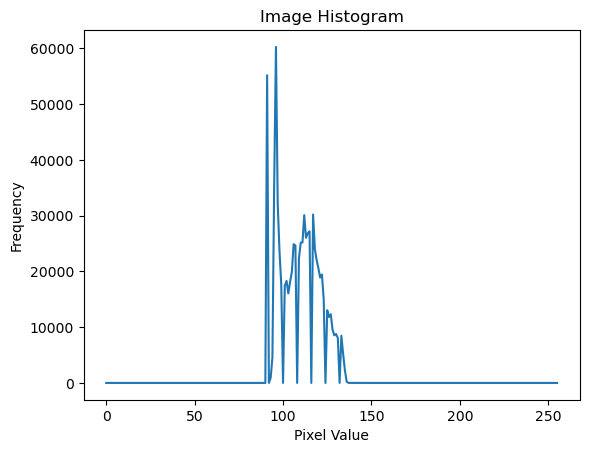

In [5]:
# Calculate histogram using builtin function
image = cv2.imread('images/p2.tif', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()